# LIBRERIE

In [36]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import itertools
from pyvis.network import Network

# DATASET

In [35]:
dataset = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/DATASET/CosciaRios2012_DataBase.csv') #lettura del dataset
dataset.drop('Code', axis=1, inplace=True) #rimuoviamo la collona dove sono presenti i codici "provinciali"
dataset = dataset.groupby(['State','Year']).sum() #sommiamo le nostre istanze in base a Stato e Anno
dataset.to_csv('Mexican_Drug_Cartels_dta.csv') #salviamo il dataset

In [37]:
dataset

Beltran_Leyva  Beltran_Leyva_Family  Familia  Golfo  Juarez  \
State Year                                                                
1     1990              0                     0        0      0       0   
      1991              0                     0        0      0       0   
      1992              0                     0        0      0       0   
      1993              0                     0        0      0       0   
      1994              0                     0        0      0       0   
...                   ...                   ...      ...    ...     ...   
32    2006              0                     0        1      1       1   
      2007              0                     0        0      5       2   
      2008              2                     0        2     12       0   
      2009              2                     1        0     13       1   
      2010              2                     0        2     13       1   

            Sinaloa  Sinaloa_Family  Tijuana  Zetas  Otros  
State Year                                                  
1     1990        0               0        0      0      0  
      1991        0               0        0      0      0  
      1992        0               0        0      0      0  
      1993        0               0        0      0      0  
      1994        0               0        0      0      0  
...             ...             ...      ...    ...    ...  
32    2006        1               0        2      0      0  
      2007        3               0        0      7      0  
      2008        3               1        0     12      0  
      2009        4               2        0     14      0  
      2010        5               1        0     13      0  

[672 rows x 10 columns]

In [3]:
dataset = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/Mexican_Drug_Cartels_dta.csv')
#dividiamo il nostro datastet in due decadi 
dta_9000 = dataset[dataset.Year < 2000] #1990-1999
dta_0010 = dataset[dataset.Year >= 2000 ] #2000-2010

# FUNZIONI

In [112]:
def Edges_Generator(dataset, name_txt, Qcartelli, stateL=False, yearL=False, yearXstate=False, cartelL=False,
                    link_state_year=False):
    #permette la creazione di edges partendo dal dataset di partenza

    #esegue un check per vedere crearli su tutte le famiglie o su una in particolare
    if Qcartelli == 'ALL':
        cartelli = ['Beltran_Leyva', 'Beltran_Leyva_Family', 'Familia', 'Golfo', 
                    'Juarez', 'Sinaloa', 'Sinaloa_Family', 'Tijuana', 'Zetas', 'Otros']
    else:
        cartelli = []
        cartelli.append(Qcartelli)

    res_list = []
    
    for state in dataset.State.unique(): #creiuamo un subset per ogni stato in maniera ricorsiva
        sub1 = dataset[dataset.State == state]

        for year in sub1.Year: #creiuamo un subset per ogni anno in maniera ricorsiva
            sub2 = sub1[sub1.Year == year]
            
            for single in cartelli:
                value = sub2[single].iloc[0] #troviamo il numero di volte che il cartello è apparso
                list = []

                if value > 0 : #eseguiamo un controllo per sapere se creare o no il collegamento
                    #in base alle impostazioni decise prendiamo PARTENZA(A), ARRIVO(B) e WEIGHT(W)
                    if yearXstate == True:
                        year_ = str(year)
                        _state = str(state)
                        year_state = str(year_ + '_' + _state)

                    if stateL == True:
                        list.append(state)
                    
                    if yearL == True:
                        list.append(year)
                    elif yearXstate == True:
                        list.append(year_state)
                    
                    if Qcartelli == 'ALL':
                        if cartelL == True:
                            list.append(single)
                    else:
                        if cartelL == True:
                            list.append(Qcartelli)
                    
                    if link_state_year == True:
                        list.append(1)
                    else:
                        list.append(value)
                    res_list.append(list)

    #creiamo il file.txt con il nome deciso nelle impostazioni                    
    name_file = str(name_txt + ".txt")
    file = open(name_file, "w+")

    file.write('A'+',')
    file.write('B'+',')
    file.write('Weight'+'\n')

    for list in res_list:
        time = 0
        for element in list:
            time = time + 1
            e = str(element)
            file.write(e)
            if time < 3:
                file.write(',')
            else:
                file.write('\n')

    file.close()

    return(file)

#----------------------------------------------------------------------------------------#

def Edges_Generator_for_Cartel(name_cartel, cartel_sigla, years_9000=False, years_0010=False):

    if years_9000 == True: #svolgo operazioni per gli anni 1990 - 1999
        #assegno i nomi ai file tramite una concatenazione di stringhe
        name_txt_9000_yXc = 'year_'+str(name_cartel)+'_'+str(cartel_sigla)+'9000'
        name_txt_9000_sXy = 'state_year_'+str(name_cartel)+'_'+str(cartel_sigla)+'9000'
        name_csv_9000 = str(name_cartel)+'_'+'9000'+'.csv'

        #utilizzo la funzione creata in precesenza per generare gli edges
        Edges_Generator(dta_9000,name_txt_9000_yXc, name_cartel, yearL=True,cartelL=True)
        Edges_Generator(dta_9000,name_txt_9000_sXy, name_cartel, stateL=True, yearL=True,link_state_year=True)

        name_txt_9000_yXc = name_txt_9000_yXc + '.txt'
        name_txt_9000_sXy = name_txt_9000_sXy + '.txt'

        #creo i percorsi delle per leggeere i file.txt sopra creati
        percorso_cartella = '/Users/emanuele/Desktop/SNA/PROGETTO/'
        percorso_1 = str(percorso_cartella) + str(name_txt_9000_sXy)
        percorso_2 = str(percorso_cartella) + str(name_txt_9000_yXc)
        percorso_3 = str(percorso_cartella) + str(name_csv_9000)

        df_1 = pd.read_csv(str(percorso_1))
        df_2 = pd.read_csv(str(percorso_2))
        df_2 = df_2.groupby(['A','B']).sum() #effettuo una somma in base ad anno e cartello
        df_2.to_csv(name_csv_9000) 
        df_2 = pd.read_csv(percorso_3)
        df = pd.concat([df_1,df_2],ignore_index=True, sort=False) #unisco le due liste di edges
    
    elif years_0010 == True: #svolgo le stesse operazioni per gli anni fra 2000 e 2010
        name_txt_0010_yXc = 'year_'+str(name_cartel)+'_'+str(cartel_sigla)+'0010'
        name_txt_0010_sXy = 'state_year_'+str(name_cartel)+'_'+str(cartel_sigla)+'0010'
        name_csv_0010 = str(name_cartel)+'_'+'0010'+'.csv'

        Edges_Generator(dta_0010,name_txt_0010_yXc, name_cartel, yearL=True,cartelL=True)
        Edges_Generator(dta_0010,name_txt_0010_sXy, name_cartel, stateL=True, yearL=True,link_state_year=True)

        name_txt_0010_yXc = name_txt_0010_yXc + '.txt'
        name_txt_0010_sXy = name_txt_0010_sXy + '.txt'

        percorso_cartella = '/Users/emanuele/Desktop/SNA/PROGETTO/'
        percorso_1 = str(percorso_cartella) + str(name_txt_0010_sXy)
        percorso_2 = str(percorso_cartella) + str(name_txt_0010_yXc)
        percorso_3 = str(percorso_cartella) + str(name_csv_0010)

        df_1 = pd.read_csv(str(percorso_1))
        df_2 = pd.read_csv(str(percorso_2))
        df_2 = df_2.groupby(['A','B']).sum()
        df_2.to_csv(name_csv_0010)
        df_2 = pd.read_csv(percorso_3)
        df = pd.concat([df_1,df_2],ignore_index=True, sort=False) 

    return(df)

#----------------------------------------------------------------------------------------#

def Edges_Only_Cartel_Network_Start(dataset,name_txt):
    
    cartelli = ['Beltran_Leyva', 'Beltran_Leyva_Family', 'Familia', 'Golfo', 
                'Juarez', 'Sinaloa', 'Sinaloa_Family', 'Tijuana', 'Zetas', 'Otros']

    final_list = []
    for state in dataset.State.unique():
        sub1 = dataset[dataset.State == state]

        for year in sub1.Year:
            sub2 = sub1[sub1.Year == year]
            
            for single in cartelli:
                value = sub2[single].iloc[0]
                list = []
                if value > 0 :
                    list.append(state)
                    list.append(year)
                    list.append(single)
                    list.append(value)
                    final_list.append(list)
                    
    name_file = str(name_txt + ".txt")
    file = open(name_file, "w+")

    file.write('A'+',')
    file.write('Bridge'+',')
    file.write('B'+',')
    file.write('Weight'+'\n')

    for list in final_list:
        time = 0
        for element in list:
            time = time + 1
            e = str(element)
            file.write(e)
            if time < 4:
                file.write(',')
            else:
                file.write('\n')

    file.close() 

    return(file)

#----------------------------------------------------------------------------------------#

def Edges_Only_Cartel_Network_Final(dataset, name_txt, name_csv, year_selected):

    Edges_Only_Cartel_Network_Start(dataset,name_txt)

    name_file_txt = name_txt+'.txt'
    name_file_csv = name_csv+'.csv'
    percorso_cartella = '/Users/emanuele/Desktop/SNA/PROGETTO/'
    percorso1 = percorso_cartella + name_file_txt
    percorso2 = percorso_cartella + name_file_csv

    data =  pd.read_csv(percorso1)

    data = data[data.Bridge == year_selected]

    data_AB = data[['A','B','Weight']]
    data_AB = data_AB.groupby(['A','B']).sum()

    data_AB.to_csv(name_file_csv)

    df = pd.read_csv(percorso2)

    edges_list = []

    for state in df.A.unique():
        sub = df[df.A == state]
        
        if len(sub) > 1:
            list_cartels = []
            for cartel in sub.B:
                list_cartels.append(cartel)

            for v in itertools.combinations(list_cartels, 2):
                edges_list.append(v)
                
                
    new_df = pd.DataFrame(columns=['A','B'])
    new_df[['A','B']]=edges_list

    new_cols = ['A','B']
    new_df = new_df.reindex(new_df.columns.union(new_cols), axis=1) 

    return(new_df)

#----------------------------------------------------------------------------------------#

def Network_Cartels_Year_Meeting_Generator(dataset,Graph,colore):
    
    cartelli = ['Beltran_Leyva', 'Beltran_Leyva_Family', 'Familia', 'Golfo', 
            'Juarez', 'Sinaloa', 'Sinaloa_Family', 'Tijuana', 'Zetas', 'Otros']
    
    edges_cartels = dataset.values.tolist()

    for cartello in cartelli:
        name = str(cartello)
        Graph.add_node(name, color = colore)

    for i in range(len(edges_cartels)):
        edge = edges_cartels[i]
        add = -1

        for o in range(len(edge)):
            add = add + 1
            
            if add == 0:
                A = edge[add]
                
            elif add == 1:
                B = edge[add]
            elif add == 2:
                W = edge[add]

        Graph.add_edge(str(A), str(B) ,weight=int(W))
          
    return(Graph)   

# NETWORK VISUALIZATION

## GENERAL

In [18]:
Edges_Generator(dta_9000,'G_yearXstate_cartel_9000','ALL',yearXstate=True,cartelL=True) #G_yearXstate_cartel_9000
Edges_Generator(dta_9000,'G_state_yearXstate_9000','ALL',stateL=True, yearXstate=True) #G_state_yearXstate_9000
df_1 = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/G_state_yearXstate_9000.txt')
df_2 = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/G_yearXstate_cartel_9000.txt')
df_9000 = pd.concat([df_1,df_2],ignore_index=True, sort=False)


Edges_Generator(dta_0010,'G_yearXstate_cartel_0010','ALL',yearXstate=True,cartelL=True) #G_yearXstate_cartel_0010
Edges_Generator(dta_0010,'G_state_yearXstate_0010','ALL',stateL=True, yearXstate=True) #G_state_yearXstate_0010
df_1 = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/G_state_yearXstate_0010.txt')
df_2 = pd.read_csv('/Users/emanuele/Desktop/SNA/PROGETTO/G_yearXstate_cartel_0010.txt')
df_0010 = pd.concat([df_1,df_2],ignore_index=True, sort=False)

## PER FAMIGLIA

In [37]:
#1990-1999: in alcuni non sono presenti dati quindi decidiamo di non eseguire la creazione 
#df_BL9000 = Edges_Generator_for_Cartel('Beltran_Leyva','BL',years_9000=True)
#df_BLF9000 = Edges_Generator_for_Cartel('Beltran_Leyva_Family','BLF',years_9000=True)
#df_F9000 = Edges_Generator_for_Cartel('Familia','F',years_9000=True)
df_G9000 = Edges_Generator_for_Cartel('Golfo','G',years_9000=True)
df_J9000 = Edges_Generator_for_Cartel('Juarez','J',years_9000=True)
df_S9000 = Edges_Generator_for_Cartel('Sinaloa','S',years_9000=True)
#df_SF9000 = Edges_Generator_for_Cartel('Sinaloa_Family','SF',years_9000=True)
df_T9000 = Edges_Generator_for_Cartel('Tijuana','T',years_9000=True)
df_Z9000 = Edges_Generator_for_Cartel('Zetas','Z',years_9000=True)
#df_O9000 = Edges_Generator_for_Cartel('Otros','O',years_9000=True)

#2000-2010
df_BL0010 = Edges_Generator_for_Cartel('Beltran_Leyva','BL',years_0010=True)
df_BLF0010 = Edges_Generator_for_Cartel('Beltran_Leyva_Family','BLF',years_0010=True)
df_F0010 = Edges_Generator_for_Cartel('Familia','F',years_0010=True)
df_G0010 = Edges_Generator_for_Cartel('Golfo','G',years_0010=True)
df_J0010 = Edges_Generator_for_Cartel('Juarez','J',years_0010=True)
df_S0010 = Edges_Generator_for_Cartel('Sinaloa','S',years_0010=True)
df_SF0010 = Edges_Generator_for_Cartel('Sinaloa_Family','SF',years_0010=True)
df_T0010 = Edges_Generator_for_Cartel('Tijuana','T',years_0010=True)
df_Z0010 = Edges_Generator_for_Cartel('Zetas','Z',years_0010=True)
df_O0010 = Edges_Generator_for_Cartel('Otros','O',years_0010=True)

## NETWORK FAMIGLIE

In [95]:
y_1992 = Edges_Only_Cartel_Network_Final(dta_9000,'network_cartels_1992','network_cartels_1992',1992)
y_1993 = Edges_Only_Cartel_Network_Final(dta_9000,'network_cartels_1993','network_cartels_1993',1993)
y_1994 = Edges_Only_Cartel_Network_Final(dta_9000,'network_cartels_1994','network_cartels_1994',1994)
y_1995 = Edges_Only_Cartel_Network_Final(dta_9000,'network_cartels_1995','network_cartels_1995',1995)

prova = pd.concat([y_1992,y_1993,y_1994,y_1994])

In [101]:
print(len(y_1992),len(y_1993),len(y_1994),len(y_1995))
print(len(prova))

1 8 5 5
19


In [96]:
prova['to'] = '_'
add = prova.A +prova.to+ prova.B
prova['bi-grams'] = add

list_ = add.values.tolist()

# importing the module
import collections
# using Counter to find frequency of elements
frequency = collections.Counter(list_)

In [97]:
prova

,A,B,to,bi-grams
0,Tijuana,Zetas,_,Tijuana_Zetas
0,Sinaloa,Tijuana,_,Sinaloa_Tijuana
1,Sinaloa,Zetas,_,Sinaloa_Zetas
2,Tijuana,Zetas,_,Tijuana_Zetas
3,Juarez,Sinaloa,_,Juarez_Sinaloa
4,Juarez,Zetas,_,Juarez_Zetas
5,Sinaloa,Zetas,_,Sinaloa_Zetas
6,Sinaloa,Tijuana,_,Sinaloa_Tijuana
7,Juarez,Sinaloa,_,Juarez_Sinaloa
0,Golfo,Tijuana,_,Golfo_Tijuana


In [98]:
list_f = list(frequency.items())

cartels_connections = []
W = []
A = []
B = []
for i in range(len(list_f)):
    cartels_connections.append(list_f[i][0])
    W.append(list_f[i][1])
    A.append(cartels_connections[i].split('_')[0])
    B.append(cartels_connections[i].split('_')[1])

#weights_of_connecctions


In [99]:
final = pd.DataFrame()
final['A'] = A
final['B'] = B
final['W'] = W
final

,A,B,W
0,Tijuana,Zetas,6
1,Sinaloa,Tijuana,2
2,Sinaloa,Zetas,4
3,Juarez,Sinaloa,2
4,Juarez,Zetas,1
5,Golfo,Tijuana,2
6,Golfo,Zetas,2


In [111]:
xx = final.values.tolist()
yy = xx[0]
yy[2]

6

In [114]:
net = nx.Graph()
Network_Cartels_Year_Meeting_Generator(final,net,'#0ee5ba')

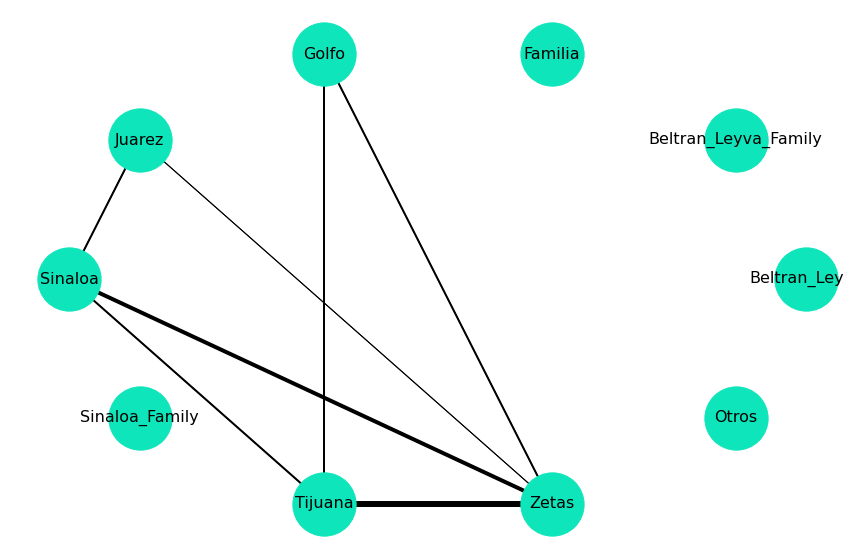

In [121]:
options = {
    "node_color" : '#0ee5ba', 
    "node_size" : 4000,
    "font_color" : 'black', 
    "font_size" : 16
}

pos=nx.circular_layout(net)
all_weights=[]
for (node1,node2,data) in net.edges(data=True):
        all_weights.append(data['weight']) #we'll use this when determining edge thickness
unique_weights = list(set(all_weights))
for weight in unique_weights:
        #4 d. Form a filtered list with just the weight you want to draw
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in net.edges(data=True) if edge_attr['weight']==weight]
        width = weight
        nx.draw_networkx_edges(net,pos,edgelist=weighted_edges,width=width)
nx.draw(net, pos, with_labels=True,**options)
plt.rcParams["figure.figsize"] = (15,10)
plt.show()